#  Simple 2-layer neural network with mini-batch gradient descent optimization for multi-class classification
+ Mini-batch GD is used mostly in deep learning in achieving good performance with respect to
+ computational efficiency and stability of the algorithm. 
+ Mini-batch GD algorithm
+ define batch_size
+ for i in range(epoch):
+ $\;\;\;\;$ np.random.shuffle(data)
+ $\;\;\;\;$ for batch in random_minibatches(data, batch_size):
+ $\;\;\;\;\;\;\;\;$ gradient = compute_gradient(batch, params)
+ $\;\;\;\;\;\;\;\;$ params = params - learning_rate * gradients
+ The mini-batch GD tends to reduce the variance of the parameter updates, which can lead to more stable convergence.
+ It can make use of highly optimized matrix, that  makes computing of  gradient very efficient.
+ The average of loss and accuracy for each mini-batch is displayed.
+ Written by JT Park, March 2021, MIT Licence

In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

eta = 0.07 # learning rate
epoch = 50
batch_size = 20 # mini-batch size

In [11]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_deriv(x):
    return x * (1.0 - x)

def relu(x):
    return np.maximum(0, x)

def relu_deriv(z):
    return (z > 0).astype(float)

def softmax(x):
    # softmax   
    e = np.exp(x - np.max(x))    # x-m is used to avoid overflow of exponent function
    return e / np.sum(e, axis=0) # add in column

class SimpleNeuralNet:
    # 3-layer neural network model
    
    def __init__(self, input_size, hidden_size, hidden_size2, output_size):
        # weight initialization
        weight_init_std = 0.01
        self.w1 = weight_init_std * np.random.randn(hidden_size, input_size) # ininialize weights at hidden layer 
        self.b1 = np.zeros((hidden_size, 1))# bias at hidden layer 
        self.w2 = weight_init_std * np.random.randn(hidden_size2, hidden_size) # ininialize weights at hidden layer 2
        self.b2 = np.zeros((hidden_size2, 1)) 
        self.w3 = weight_init_std * np.random.randn(output_size, hidden_size2)# initialize weights at output layer             
        self.b3 = np.zeros((output_size, 1)) # bias at output layer   
        
        # layer output initialization
        self.hidden  = np.zeros((hidden_size, ))
        self.hidden2  = np.zeros((hidden_size2, ))# output at hidden layer 1
        self.output  = np.zeros((output_size, )) # output of output layer
    
    def forwardprop(self, input):
        # forward processing of inputs and weights using sigmoid activation function
        self.hidden = relu(np.dot(self.w1, input.T) + self.b1)
        
        self.hidden2 = relu(np.dot(self.w2, self.hidden) + self.b2)
        
        self.output = softmax(np.dot(self.w3, self.hidden2) + self.b3)
        return (self.output)

    def backprop(self, input, target):
        # backward processing of appling the chain rule to find derivative of the loss function with respect to weights
        delta3 = (self.output - target.T) 
        delta2 = np.dot(self.w3.T, delta3) * relu_deriv(self.hidden2)
        delta1 = np.dot(self.w2.T, delta2) * relu_deriv(self.hidden)
        dw3 = np.dot(delta3, self.hidden2.T)
        dw2 = np.dot(delta2, self.hidden.T)
        dw1 = np.dot(delta1, input)

        # update the weights with the derivative of the loss function   
        self.w3 -= eta * dw3 / batch_size
        self.w2 -= eta * dw2 / batch_size
        self.w1 -= eta * dw1 / batch_size
  
        # update biases with the derivative of the loss function
        self.b3 -= eta * np.sum(delta3, axis = 1, keepdims=True) / batch_size
        self.b2 -= eta * np.sum(delta2, axis = 1, keepdims=True) / batch_size # add in row axis, keeping column dimension
        self.b1 -= eta * np.sum(delta1, axis = 1, keepdims=True) / batch_size # add in row axis, keeping column dimension   
        
    def calculate_error(self, target):
        # calculate error
        # 1e-5 is added to avoid the divide by zero in log  
        error = np.sum(-target.T * np.log(self.output + 1e-5)) # cross entropy loss function
        return error

    def calculate_accuracy(self, target):
        # calculate accuracy
        target_label = np.argmax(target, axis = 1)
        output_label = np.argmax(self.output.T, axis = 1)
        accuracy = 100 * np.sum(target_label == output_label) / float(target.shape[0])
        return accuracy

### Data Set
+ The sample data is split into training data and test data. The test data is used to test the accuracy of the model
+ for the sample data which was not used at training phase. After testing phase, the model can be used to predict the + new input data. 

feature set shape: (3000, 2)


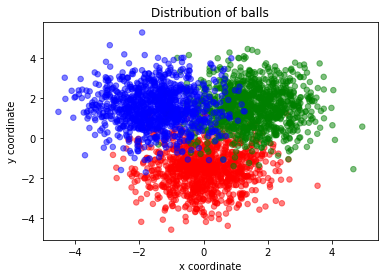

concatenated dataset shape: (3000, 5)
train dataset shape: (2100, 5)
test dataset shape: (900, 5)


In [12]:
if __name__ == "__main__":

    # get training data set
    samples = 1000
    attributes = 2
    classes = 3

    np.random.seed(45)
    data1_set = np.random.randn(samples, attributes) + np.array([0.0, -1.5])  # red ball
    data2_set = np.random.randn(samples, attributes) + np.array([1.5, 1.5])   # green ball
    data3_set = np.random.randn(samples, attributes) + np.array([-1.5, 1.5])  # blue ball
    #data1_set = np.random.randn(samples, attributes) + np.array([0.0, -1.5, 1.5]) # red ball
    #data2_set = np.random.randn(samples, attributes) + np.array([1.5, 0.0, -1.5]) # green ball
    #data3_set = np.random.randn(samples, attributes) + np.array([-1.5, 1.5, 0.0]) # blue ball
    
    feature_set = np.vstack([data1_set, data2_set, data3_set])   
    print("feature set shape:", feature_set.shape)
    labels = np.array([0]*samples + [1]*samples + [2]*samples)

    # Initializing colors and building a colormap
    cmap = mpl.colors.ListedColormap(['red', 'green', 'blue'])

    # display data training data set
    # plt.figure(figsize=(10,7))
    plt.title("Distribution of balls")
    plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap =cmap, s= 30, alpha=0.5)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    plt.show()

    one_hot_labels = np.zeros((samples*classes, classes))

    for i in range(samples*classes):  
        one_hot_labels[i, labels[i]] = 1

    # concatenate feature data and labels, and shuffle it
    concat_data = np.concatenate((feature_set, one_hot_labels), axis = 1)
    print("concatenated dataset shape:", concat_data.shape)
    np.random.shuffle(concat_data) # shuffle the concatenated data 

    # extract training data and test data from concatenated data
    train_data = concat_data[0:math.floor(3*samples * 0.7), :]  # 70 % samples are selected for training data
    test_data = concat_data[math.floor(3*samples * 0.7):3*samples, :]  # 30 % samples are selected for test data
    print("train dataset shape:", train_data.shape)
    print("test dataset shape:", test_data.shape)
   
    test_input = test_data[:, 0:2]
    test_target = test_data[:, 2:5]

    training_loss = []
    training_accuracy = [] 

    # construct NN model
    nn = SimpleNeuralNet(input_size=2,  hidden_size=20, hidden_size2=100, output_size=3)     


### Training 
+ Training data are processed in mini-batch mode.
+ Both loss and accuracy at training step are evaluated. 

In [13]:
    # training 
    for i in range(epoch):

        np.random.shuffle(train_data) # randomize the training data
        train_input = train_data[:, 0:2] # extract training input data
        train_target = train_data[:, 2:5] # extract training target labels
        num_batch = int(math.ceil(train_data.shape[0]/batch_size))  # trainining data divided by mini-batch size
        loss_sum = 0
        accu_sum = 0

        eta = 0.95*eta  # learning rate decay

        for j in range(num_batch): 
            x = train_input[batch_size * j: batch_size * (j+1)]     # define training input for mini-batch data 
            y = train_target[batch_size * j: batch_size * (j+1)]   # define training target for mini-batch data 
            
            nn.forwardprop(x)
            nn.backprop(x, y)      

            # calculate loss and accuracy
            loss_sum += nn.calculate_error(y)
            accu_sum += nn.calculate_accuracy(y)

        if (i % 2) == 0:
            training_loss.append(loss_sum / num_batch)
            training_accuracy.append(accu_sum / num_batch)

### Train loss and accuracy, test accuracy
+ Visualizing train loss and accuracy.
+ It is shown that train loss and accuracy is not smooth in comparision with batch GD.
+ Here, the average values of train loss and accuracy are displayed. 
+ During test step, the accuracy for the test data is calculated. 
+ Finally, the prediction of arbitrary input data  can be done after test step.

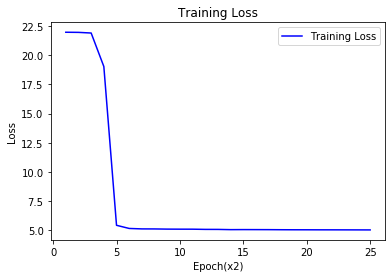

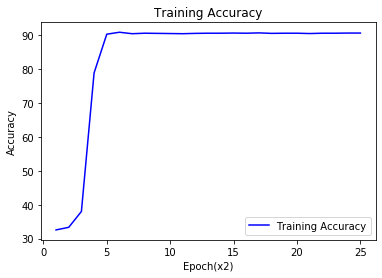

Test accuracy: 91.66666666666667
Test accuracy: [21.989245444413907, 21.978390463071108, 21.922023228465346, 19.04316472141609, 5.3991188797125265, 5.127719248481424, 5.089402203105966, 5.08603084963491, 5.071075787444189, 5.066383514750017, 5.064921373392465, 5.047703398125567, 5.045796253675426, 5.0258502922716195, 5.03046233968919, 5.0280273479961, 5.025211411634962, 5.018477720567522, 5.014440176570051, 5.013114974446066, 5.010077778299065, 5.009196329723102, 5.007189240583139, 5.0048122895489735, 5.002277850798436]
Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       288
           1       0.89      0.91      0.90       302
           2       0.93      0.90      0.92       310

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



In [14]:
    # show the training loss
    epoch_count = range(1, len(training_loss) + 1)
    plt.plot(epoch_count, training_loss, 'b-')
    plt.title('Training Loss')
    plt.legend(['Training Loss'])
    plt.xlabel('Epoch(x2)')
    plt.ylabel('Loss')
    plt.show()
    
    # show the training accuracy of the model
    plt.plot(epoch_count, training_accuracy, 'b-')
    plt.title('Training Accuracy')
    plt.legend(['Training Accuracy'])
    plt.xlabel('Epoch(x2)')
    plt.ylabel('Accuracy')
    plt.show()
    
   # testing the output for a given test input data and evaluate the test accuracy
    test_prediction = nn.forwardprop(test_input)
    test_prediction_label = np.argmax(test_prediction.T, axis = 1)
    test_target_label = np.argmax(test_target, axis = 1)
    test_accuracy = 100 * np.sum(test_target_label == test_prediction_label) / float(test_target_label.shape[0])
    print("Test accuracy:", test_accuracy)
    
   # evaluate performance metrics: recall, precision, F1-score
    preds = []
    for row in test_prediction_label:
        preds.append(row)

    targets = []
    for row in test_target_label:
        targets.append(row)

    from sklearn.metrics import classification_report
    print("Classification Report for Test Data\n")
    print(classification_report(preds, targets))


In [15]:
    # predicting the output for a given input data
    # For a given input data [1, -1], it is predicated as red ball since the output is [0, 1, 0], i.e. the red ball.
    new_data = np.array([[1.0, -1.0]])
    predicted_output = nn.forwardprop(new_data)
    print("Predicted data based on trained weights: ")
    print("Input: ", new_data)
    print("Output: ", predicted_output.T)
    if np.argmax(predicted_output.T) == 0:
        print("it is predicted to be red ball.")
    elif np.argmax(predicted_output.T) == 1:
        print("it is predicted to be green ball.")
    elif np.argmax(predicted_output.T) == 2:
        print("it is predicted to be blue ball.") 

Predicted data based on trained weights: 
Input:  [[ 1. -1.]]
Output:  [[0.95066994 0.03514553 0.01418453]]
it is predicted to be red ball.
